# Model Validation

In [1]:
import pandas as pd

db = pd.read_csv("diabetes.csv")
db.head()

X_features = db.drop('Outcome', axis=1)
print(X_features.shape)
y_target = db['Outcome']
print(y_target.shape)

(768, 8)
(768,)


## 50% train test distribution

In [4]:
from sklearn.model_selection import train_test_split # split the data with 50% in each set

X1, X2, y1, y2 = train_test_split(X_features, y_target, random_state=1, train_size=0.5)

In [5]:
from sklearn.naive_bayes import GaussianNB     # 1. choose model class
model = GaussianNB()                           # 2. instantiate model

# fit the model on one set of data
model.fit(X1, y1)

GaussianNB()

In [6]:
from sklearn.metrics import accuracy_score

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.7369791666666666

## 2-fold Cross Validation

In [7]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.7473958333333334, 0.7369791666666666)

## 5-fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_features, y_target, cv=5)

array([0.75324675, 0.72727273, 0.74675325, 0.78431373, 0.74509804])

## ## Leave-One-Out Cross Validation

In [13]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X_features, y_target, cv=LeaveOneOut())

scores

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.

In [14]:
print(scores.mean())

0.75390625


## Validation Curve

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve


param_range = np.arange(1, 21, 1)
train_scores, test_scores = validation_curve(GaussianNB(),
                                             X_features, y_target,
                                             param_name="var_smoothing",
                                             param_range=param_range,
                                             cv=5, scoring="accuracy")

In [40]:
mean_train_score = np.mean(train_scores, axis=1)
std_train_score = np.std(train_scores, axis=1)
mean_test_score = np.mean(test_scores, axis=1)
std_test_score = np.std(test_scores, axis=1)

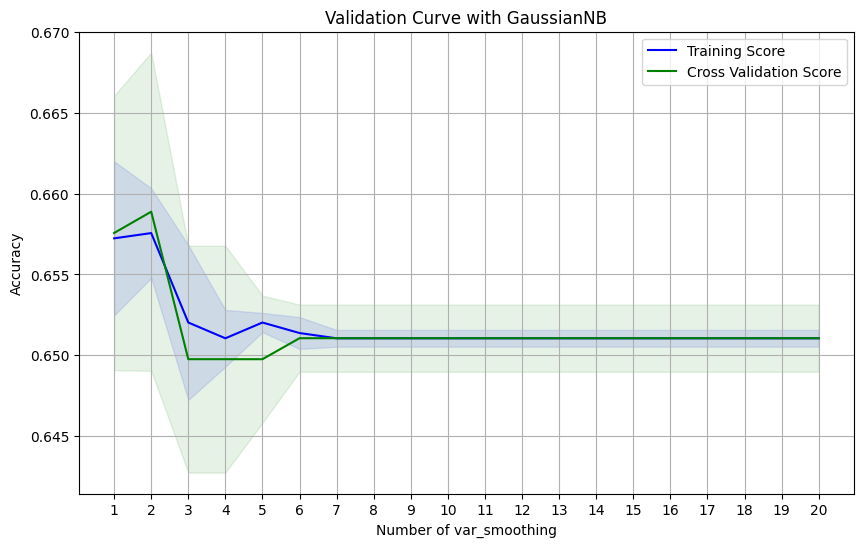

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(param_range, mean_train_score, label="Training Score", color='blue')
plt.plot(param_range, mean_test_score, label="Cross Validation Score", color='green')
plt.fill_between(param_range, mean_train_score - std_train_score, mean_train_score + std_train_score, color='blue', alpha=0.1)
plt.fill_between(param_range, mean_test_score - std_test_score, mean_test_score + std_test_score, color='green', alpha=0.1)
plt.title("Validation Curve with GaussianNB")
plt.xlabel("Number of var_smoothing")
plt.ylabel("Accuracy")
plt.xticks(param_range)
plt.legend(loc="best")
plt.grid()
plt.show()

In [44]:
param_range = np.arange(1, 21, 1)
train_scores, test_scores = validation_curve(GaussianNB(),
                                             X_features, y_target,
                                             param_name="var_smoothing",
                                             param_range=param_range,
                                             cv=5, scoring="neg_mean_squared_error")

In [45]:
mean_train_score = np.mean(train_scores, axis=1)
std_train_score = np.std(train_scores, axis=1)
mean_test_score = np.mean(test_scores, axis=1)
std_test_score = np.std(test_scores, axis=1)

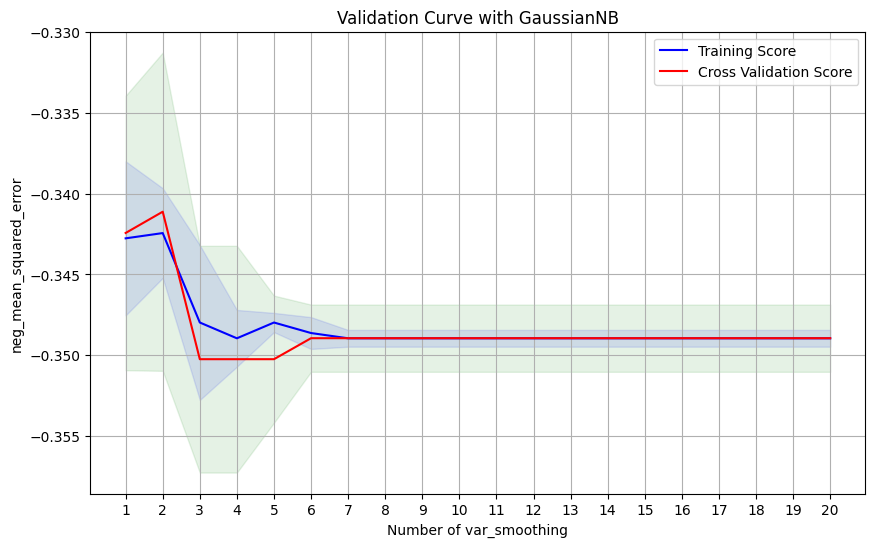

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(param_range, mean_train_score, label="Training Score", color='blue')
plt.plot(param_range, mean_test_score, label="Cross Validation Score", color='red')
plt.fill_between(param_range, mean_train_score - std_train_score, mean_train_score + std_train_score, color='blue', alpha=0.1)
plt.fill_between(param_range, mean_test_score - std_test_score, mean_test_score + std_test_score, color='green', alpha=0.1)
plt.title("Validation Curve with GaussianNB")
plt.xlabel("Number of var_smoothing")
plt.ylabel("neg_mean_squared_error")
plt.xticks(param_range)
plt.legend(loc="best")
plt.grid()
plt.show()